In [23]:
import pandas as pd
df=pd.read_csv('mushroom.csv')
print(df)

# numbers rows and columns
print('rows and columns ',df.shape)

# finding column data type
print(df.dtypes)

      Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched   

# checking there any null values in the column and replace with corresponding value
print(df.isnull().sum())

In [11]:
print(df.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


##  Exploratoty Data Analysis

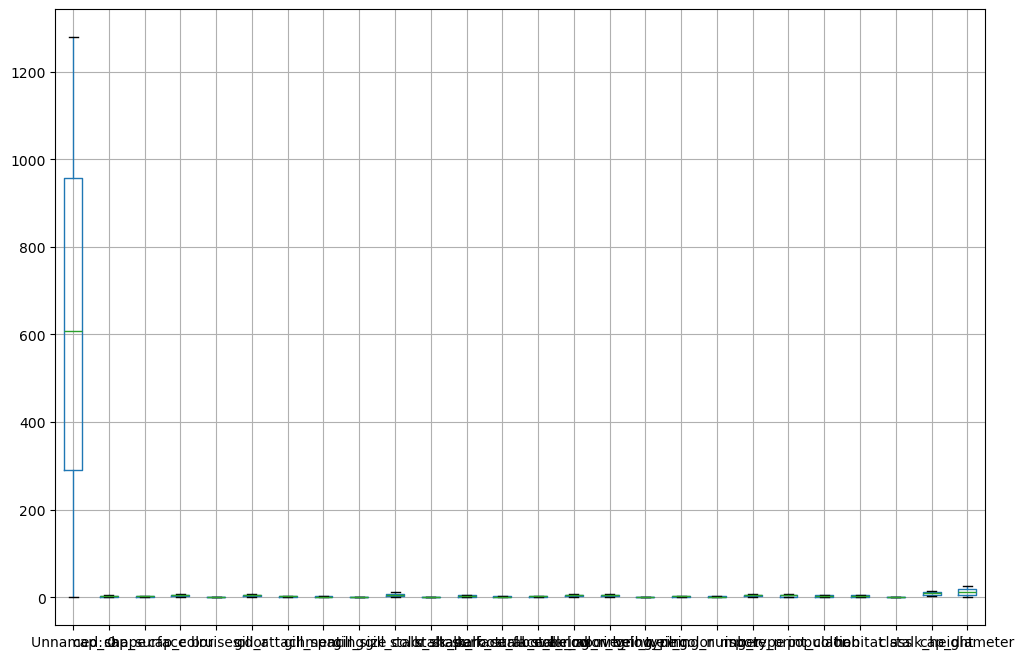

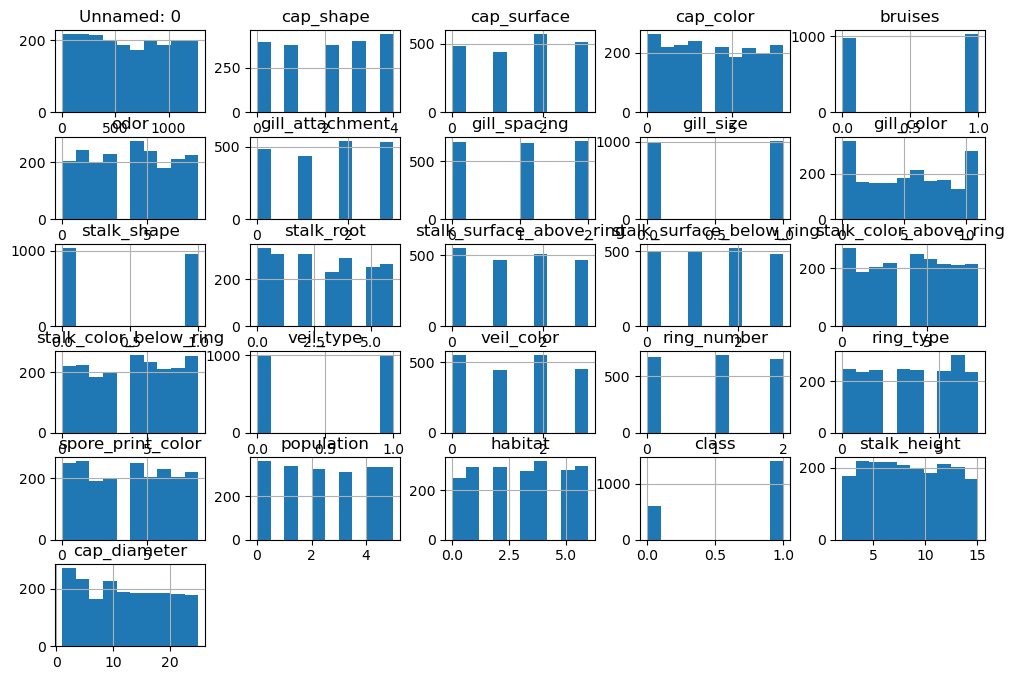

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box-plot
df.boxplot(figsize=(12,8))
plt.show()

# There are no outliers in the data

# Histogrtam
df.hist(figsize=(12,8))
plt.show()

## Data Preprocessing

## 1.Encode categorical variables if necessary

In [25]:
# convert object data type columns into numberical data column

# gethering object columns
mn=df.iloc[:,1:24]
mn

# import LableEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in mn:
    df[i]=le.fit_transform(df[i])

# importing StandardScaler
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# ss.fit_transform(df.iloc[:,1:24])
df



Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         863          4            2          0        1     4   
1996        1160          4            2          5        1     5   
1997         265          2            1          3        1     3   
1998         411          0            3          7        0     7   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1995                0             1          1           3  ...          0   
1996                0             2          1           9  ...          0   
1997                3             0          1           7  ...          0   
1998                2             0          1           6  ...          1   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1     14.276173      5.054983  
1           5      0      3.952715     19.068319  
2           5      1      9.054265      7.205884  
3           0      1      5.226499     20.932692  
4           4      1     14.037532     12.545245  
...       ...    ...           ...           ...  
1995        1      1      5.877891     17.464145  
1996        5      1      6.500840     13.501957  
1997        6      1     13.558064     11.270020  
1998        6      1     11.092703      8.423199  
1999        4      1     13.066414     21.056642  

[2000 rows x 26 columns]

## 2.Split the dataset into training and testing sets

In [5]:
df.corr()

Unnamed: 0  cap_shape  cap_surface  cap_color  \
Unnamed: 0                  1.000000   0.076872    -0.018136   0.024111   
cap_shape                   0.076872   1.000000    -0.003244   0.009615   
cap_surface                -0.018136  -0.003244     1.000000   0.003153   
cap_color                   0.024111   0.009615     0.003153   1.000000   
bruises                    -0.046627  -0.001190    -0.021352   0.016445   
odor                       -0.012730  -0.030119    -0.021926  -0.065410   
gill_attachment            -0.005051   0.015477    -0.010513   0.023835   
gill_spacing                0.048191  -0.048783     0.068918  -0.015628   
gill_size                  -0.022992   0.040497    -0.038490   0.009888   
gill_color                  0.038452   0.032123     0.045561  -0.005898   
stalk_shape                -0.022255   0.011573    -0.024032  -0.020397   
stalk_root                  0.013280   0.057405    -0.008284  -0.004423   
stalk_surface_above_ring   -0.061770  -0.030537     0.016799  -0.019983   
stalk_surface_below_ring   -0.097594  -0.000870    -0.000493   0.000528   
stalk_color_above_ring     -0.019583  -0.021350    -0.048534   0.038920   
stalk_color_below_ring      0.014746   0.027522    -0.011742   0.036951   
veil_type                   0.019658  -0.039029    -0.068705  -0.020039   
veil_color                 -0.048383  -0.017399     0.040341  -0.036166   
ring_number                -0.067070   0.036999     0.005855   0.055593   
ring_type                   0.022166   0.010172     0.017616   0.021509   
spore_print_color          -0.003308   0.024596    -0.042134   0.082155   
population                  0.018726   0.003602    -0.003963  -0.027551   
habitat                     0.051532   0.028388    -0.038661  -0.025568   
class                       0.005902   0.001140    -0.046409  -0.078029   
stalk_height               -0.001508   0.024540     0.043482   0.044086   
cap_diameter                0.051881   0.037743     0.016606  -0.000489   

                           bruises      odor  gill_attachment  gill_spacing  \
Unnamed: 0               -0.046627 -0.012730        -0.005051      0.048191   
cap_shape                -0.001190 -0.030119         0.015477     -0.048783   
cap_surface              -0.021352 -0.021926        -0.010513      0.068918   
cap_color                 0.016445 -0.065410         0.023835     -0.015628   
bruises                   1.000000  0.026274         0.009402     -0.004458   
odor                      0.026274  1.000000        -0.055214     -0.002847   
gill_attachment           0.009402 -0.055214         1.000000     -0.063604   
gill_spacing             -0.004458 -0.002847        -0.063604      1.000000   
gill_size                 0.041851 -0.027313         0.009386     -0.022650   
gill_color               -0.035135 -0.051793         0.035279     -0.010729   
stalk_shape               0.007928  0.009072        -0.018698      0.051041   
stalk_root               -0.014604 -0.005430        -0.013484      0.000668   
stalk_surface_above_ring -0.043735  0.063281        -0.021187     -0.031336   
stalk_surface_below_ring -0.013857  0.005568        -0.009479     -0.043794   
stalk_color_above_ring    0.009374 -0.006393         0.011811     -0.045491   
stalk_color_below_ring   -0.077316 -0.007103         0.007839      0.003012   
veil_type                 0.016775  0.028177        -0.042727     -0.016567   
veil_color               -0.053680  0.015397        -0.023648      0.004960   
ring_number              -0.022588 -0.068819         0.080437      0.024984   
ring_type                -0.028750  0.033956        -0.006025      0.001516   
spore_print_color        -0.026481 -0.057705         0.039356      0.016376   
population                0.012976 -0.011753        -0.002649     -0.004920   
habitat                   0.013392 -0.051237         0.005944      0.004055   
class                    -0.015498  0.039536        -0.028194      0.046505   
stalk_height             

In [26]:

X=pd.concat([df.iloc[:,1:23],df.iloc[:,24:]],axis=1)

Y=df['class']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0             4            2          7        0     1                1   
1             4            0          6        0     1                3   
2             3            1          5        1     4                1   
3             0            2          4        1     3                3   
4             3            3          8        1     5                2   
...         ...          ...        ...      ...   ...              ...   
1995          4            2          0        1     4                0   
1996          4            2          5        1     5                0   
1997          2            1          3        1     3                3   
1998          0            3          7        0     7                2   
1999          2            2          8        1     7                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0                2          0           7            1  ...   
1                1          1           3            0  ...   
2                1          0           8            1  ...   
3                0          0           6            0  ...   
4                1          1           6            0  ...   
...            ...        ...         ...          ...  ...   
1995             1          1           3            1  ...   
1996             2          1           9            1  ...   
1997             0          1           7            1  ...   
1998             0          1           6            0  ...   
1999             0          1           8            0  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                          8          0           0            2          6   
1                          0          1           0            2          6   
2                          3          1           3            2          6   
3                          5          0           3            2          0   
4                          7          1           2            0          4   
...                      ...        ...         ...          ...        ...   
1995                       4          0           1            1          2   
1996                       4          0           2            1          7   
1997                       6          0           0            2          1   
1998                       5          1           3            1          0   
1999                       0          0           2            2          3   

      spore_print_color  population  habitat  stalk_height  cap_diameter  
0                     3           1        5     14.276173      5.054983  
1                     1           2        5      3.952715     19.068319  
2                     6           0        5      9.054265      7.205884  
3                     4           1        0      5.226499     20.932692  
4                     8           1        4     14.037532     12.545245  
...                 ...         ...      ...           ...           ...  
1995                  6           0        1      5.877891     17.464145  
1996                  8           2        5      6.500840     13.501957  
1997                  8           0        6     13.558064     11.270020  
1998                  1           5        6     11.092703      8.423199  
1999                  7           2        4     13.066414     21.056642  

[2000 rows x 24 columns]

In [27]:
# RIDGE regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
import pandas as pd
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2,random_state=499)
LR.fit(X_train,Y_train)
RR=Ridge(alpha=100)
RR.fit(X_train,Y_train)
RR.coef_


LR.fit(X_train,Y_train)
df_coef=pd.concat([pd.DataFrame(list(X)),pd.DataFrame(LR.coef_)],axis=1)
df_coef.columns=['','Coefficient']
df_coef['RR_coef']=RR.coef_
df_coef

Coefficient   RR_coef
0                  cap_shape     0.001464  0.001298
1                cap_surface    -0.010171 -0.009833
2                  cap_color    -0.011084 -0.011076
3                    bruises    -0.000427 -0.000181
4                       odor     0.005252  0.005256
5            gill_attachment    -0.001419 -0.001626
6               gill_spacing     0.025138  0.022931
7                  gill_size     0.025451  0.020148
8                 gill_color    -0.001808 -0.001913
9                stalk_shape     0.023181  0.018468
10                stalk_root     0.011477  0.011402
11  stalk_surface_above_ring     0.019250  0.018247
12  stalk_surface_below_ring     0.000387  0.000393
13    stalk_color_above_ring    -0.009717 -0.009705
14    stalk_color_below_ring     0.002302  0.002375
15                 veil_type     0.021607  0.016857
16                veil_color     0.000254  0.000150
17               ring_number    -0.013567 -0.012287
18                 ring_type    -0.005252 -0.005137
19         spore_print_color     0.002244  0.002278
20                population     0.005998  0.005873
21                   habitat    -0.015984 -0.015756
22              stalk_height    -0.000824 -0.000820
23              cap_diameter     0.000329  0.000273

In [28]:
# droping the columns that are near to zero lets take the numbers having upto 0.00 after this 
X_new=X.drop(X.columns[[3,12,16,22,23]],axis=1)
X_new

cap_shape  cap_surface  cap_color  odor  gill_attachment  gill_spacing  \
0             4            2          7     1                1             2   
1             4            0          6     1                3             1   
2             3            1          5     4                1             1   
3             0            2          4     3                3             0   
4             3            3          8     5                2             1   
...         ...          ...        ...   ...              ...           ...   
1995          4            2          0     4                0             1   
1996          4            2          5     5                0             2   
1997          2            1          3     3                3             0   
1998          0            3          7     7                2             0   
1999          2            2          8     7                1             0   

      gill_size  gill_color  stalk_shape  stalk_root  \
0             0           7            1           2   
1             1           3            0           6   
2             0           8            1           2   
3             0           6            0           1   
4             1           6            0           4   
...         ...         ...          ...         ...   
1995          1           3            1           0   
1996          1           9            1           5   
1997          1           7            1           4   
1998          1           6            0           6   
1999          1           8            0           1   

      stalk_surface_above_ring  stalk_color_above_ring  \
0                            3                       3   
1                            2                       2   
2                            1                       8   
3                            3                       8   
4                            0                       3   
...                        ...                     ...   
1995                         2                       5   
1996                         0                       5   
1997                         3                       0   
1998                         1                       3   
1999                         0                       3   

      stalk_color_below_ring  veil_type  ring_number  ring_type  \
0                          8          0            2          6   
1                          0          1            2          6   
2                          3          1            2          6   
3                          5          0            2          0   
4                          7          1            0          4   
...                      ...        ...          ...        ...   
1995                       4          0            1          2   
1996                       4          0            1          7   
1997                       6          0            2          1   
1998                       5          1            1          0   
1999                       0          0            2          3   

      spore_print_color  population  habitat  
0                     3           1        5  
1                     1           2        5  
2                     6           0        5  
3                     4           1        0  
4                     8           1        4  
...                 ...         ...      ...  
1995                  6           0        1  
1996                  8           2        5  
1997                  8           0        6  
1998                  1           5        6  
1999                  7           2        4  

[2000 rows x 19 columns]

In [12]:
# Apply Lasso and Ridge methods on the model.


# RIDGE regression

import numpy as np
from sklearn.metrics import mean_squared_error
# Cross validation method
training_loss = []
test_loss = []

for i in range(0,500,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X_new,Y,test_size = 0.2,random_state=i)
    LR.fit(X_train,Y_train)
    y_pred_train = LR.predict(X_train)
    y_pred_test = LR.predict(X_test)
    training_loss.append(np.sqrt(mean_squared_error(Y_train,y_pred_train)))
    test_loss.append(np.sqrt(mean_squared_error(Y_test,y_pred_test)))

import numpy as np
print("Ridge- Training  loss: ",np.mean(training_loss).round(2))
print("Ridge- Test loss: ",np.mean(test_loss).round(2))

#
# Ridge- Training  loss:  0.45
# Ridge- Test loss:  0.46

Ridge- Training  loss:  0.45
Ridge- Test loss:  0.46


## Data Visualization

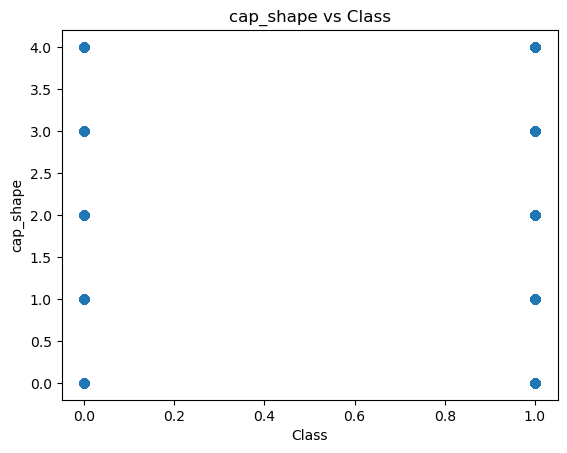

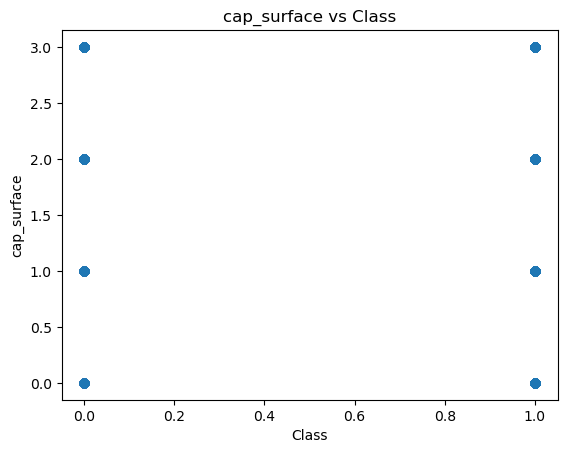

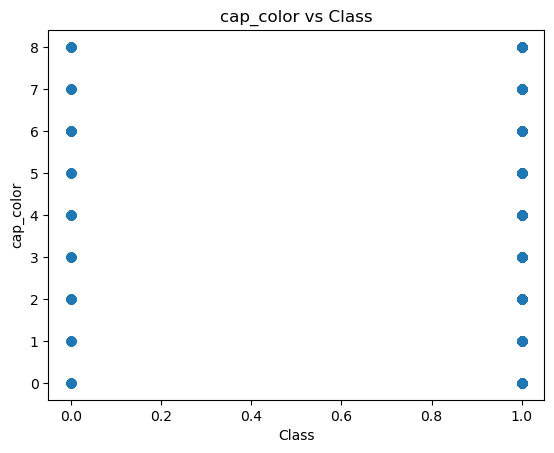

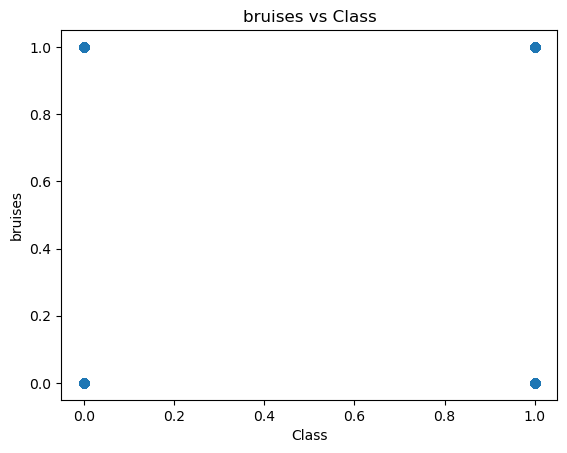

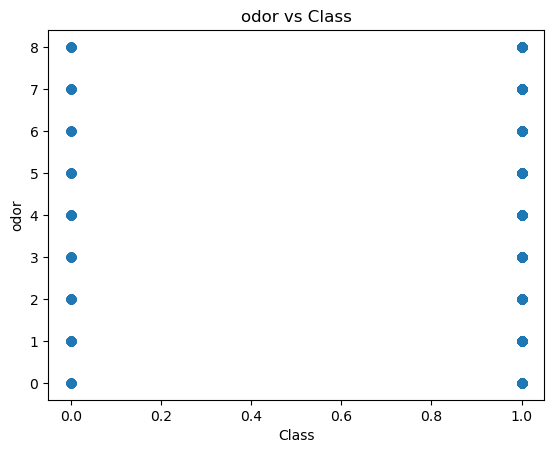

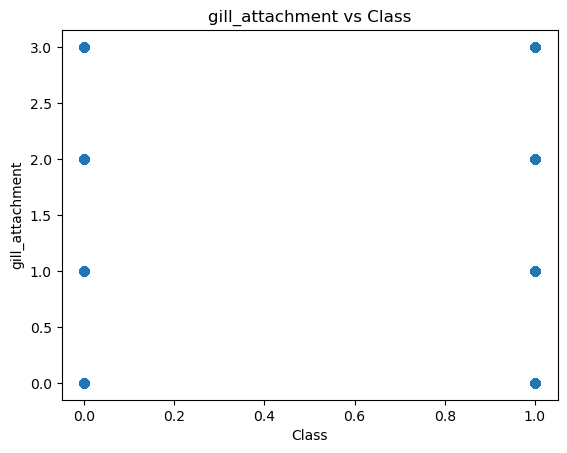

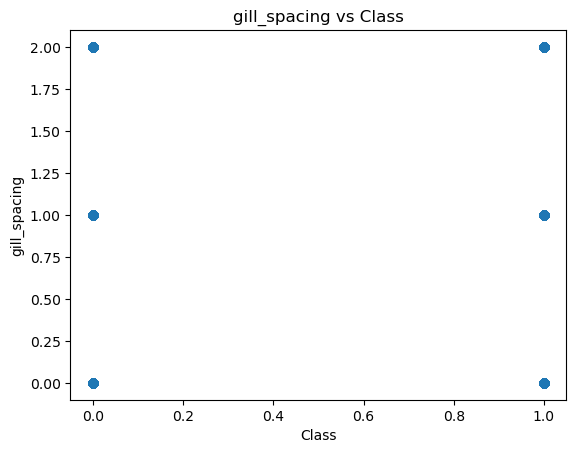

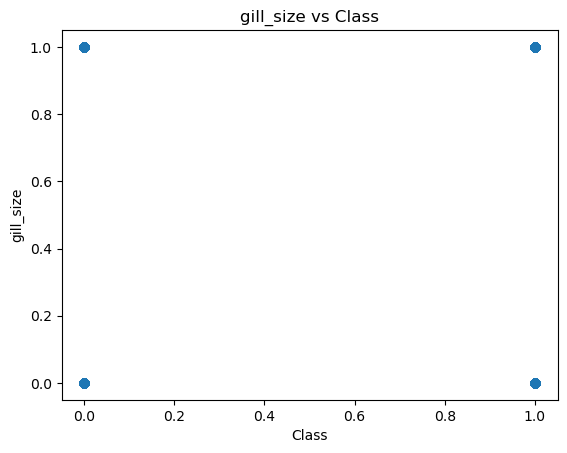

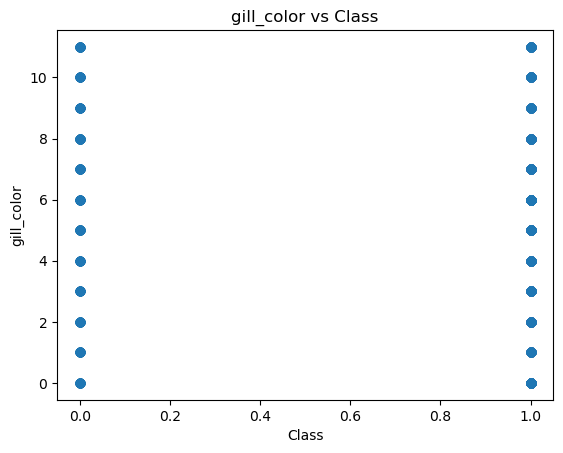

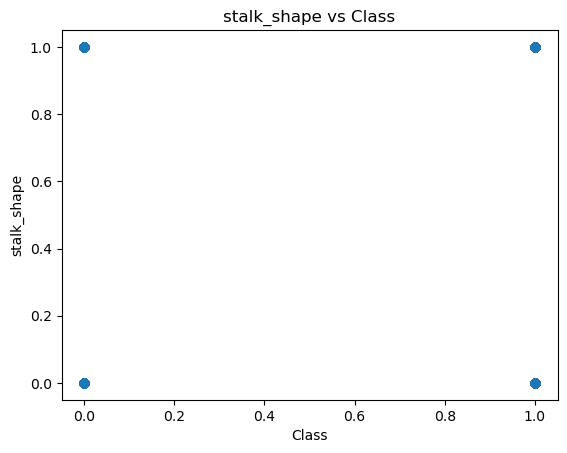

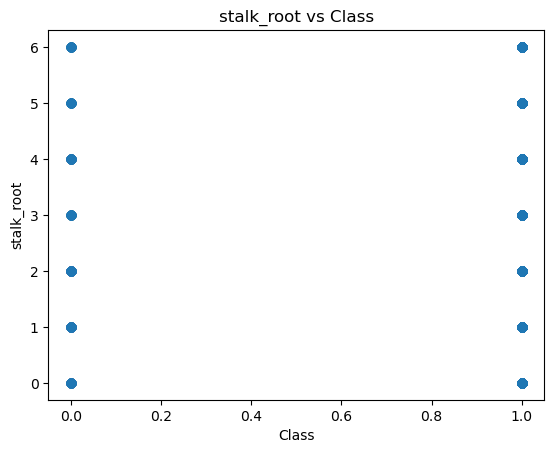

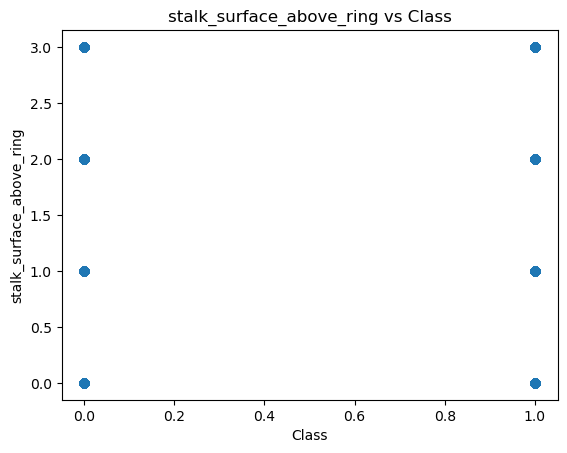

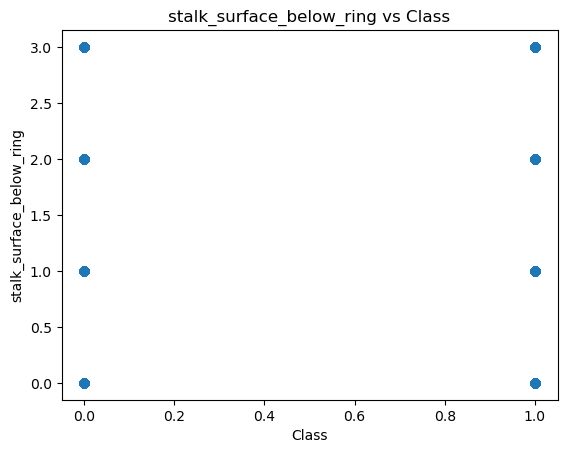

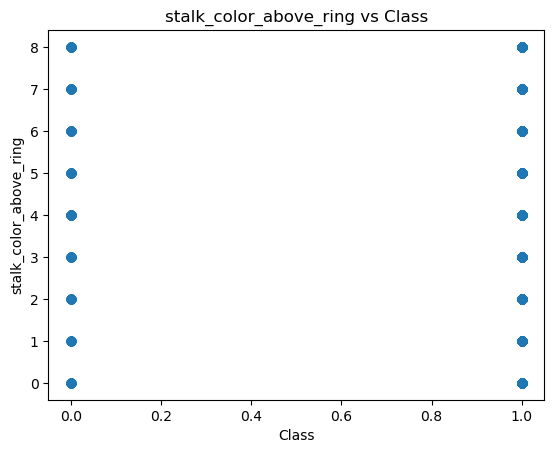

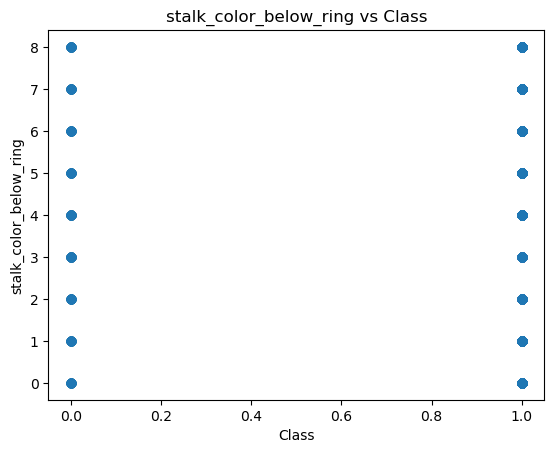

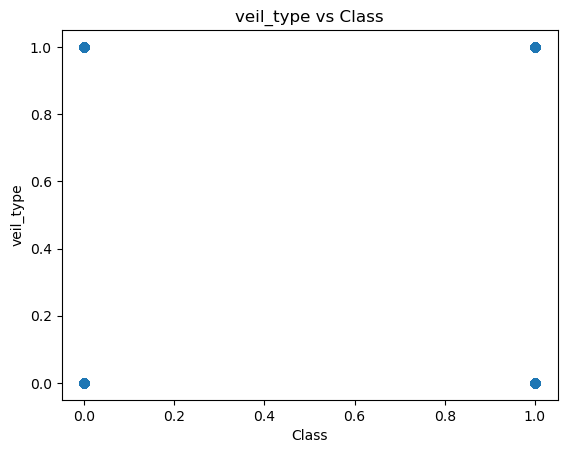

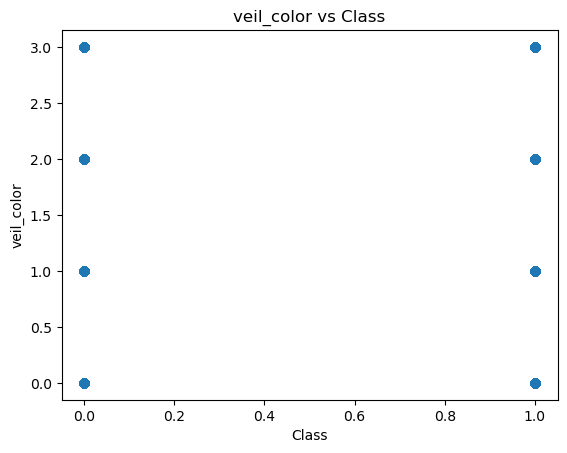

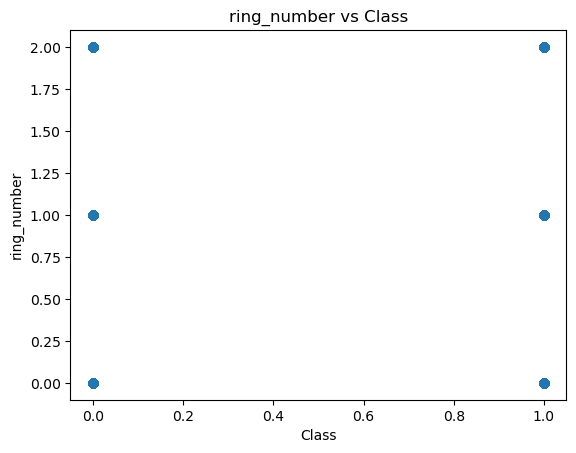

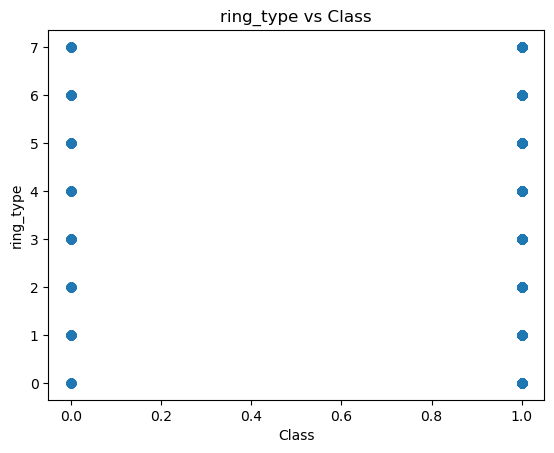

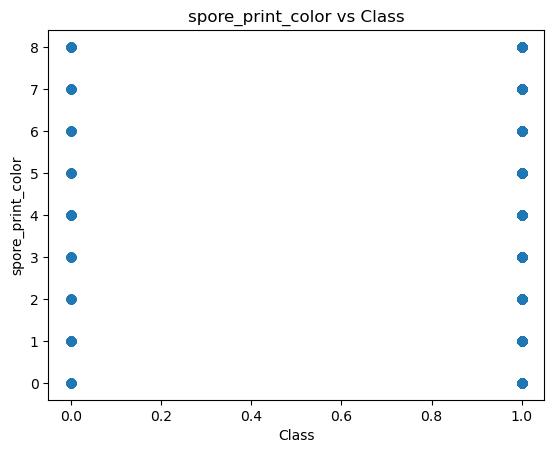

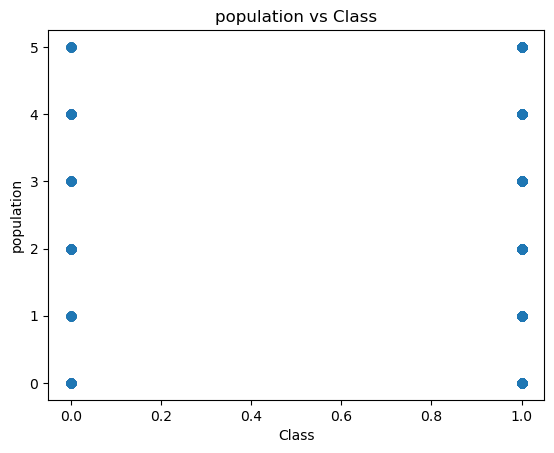

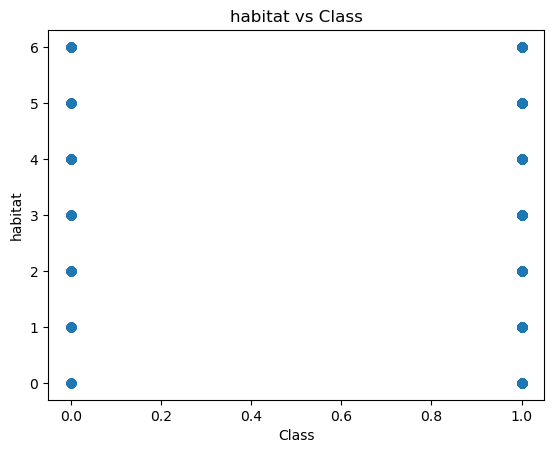

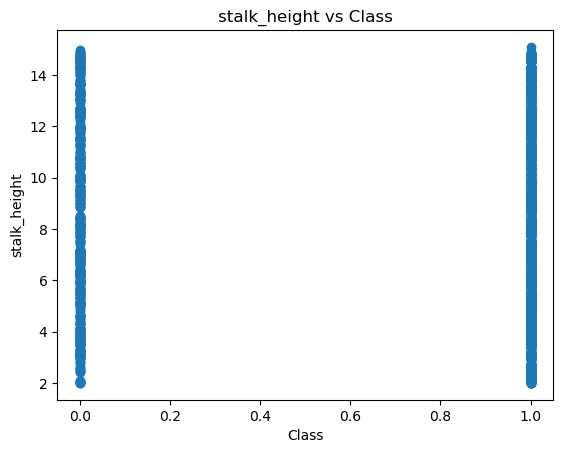

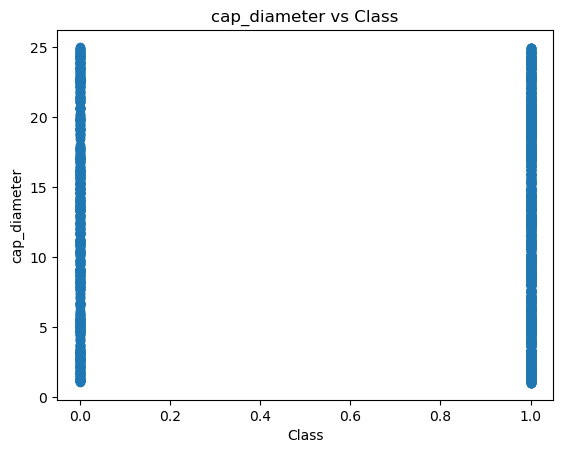

In [36]:
# Scatter plot
import numpy as np
import matplotlib.pyplot as plt
data = np.random.rand(25,25)
data

#Get all columns except the target column
columns = X.columns[:]
columns

# Create a scatter plot for each column
for i in columns:
    plt.scatter(Y,X[i])
    # plt.plot(X[i],Y,color='Gray')
    plt.ylabel(f'{i}')
    plt.xlabel("Class")
    plt.title(f'{i} vs Class')
    plt.show()


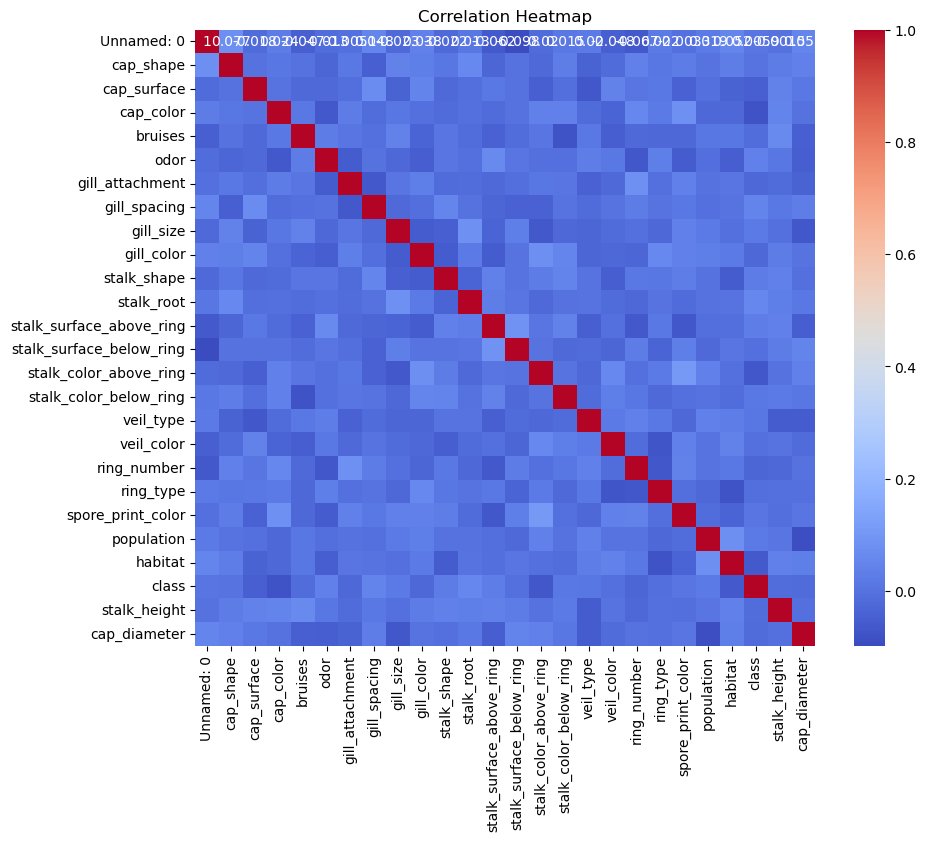

In [17]:

# Heatmap ploting
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

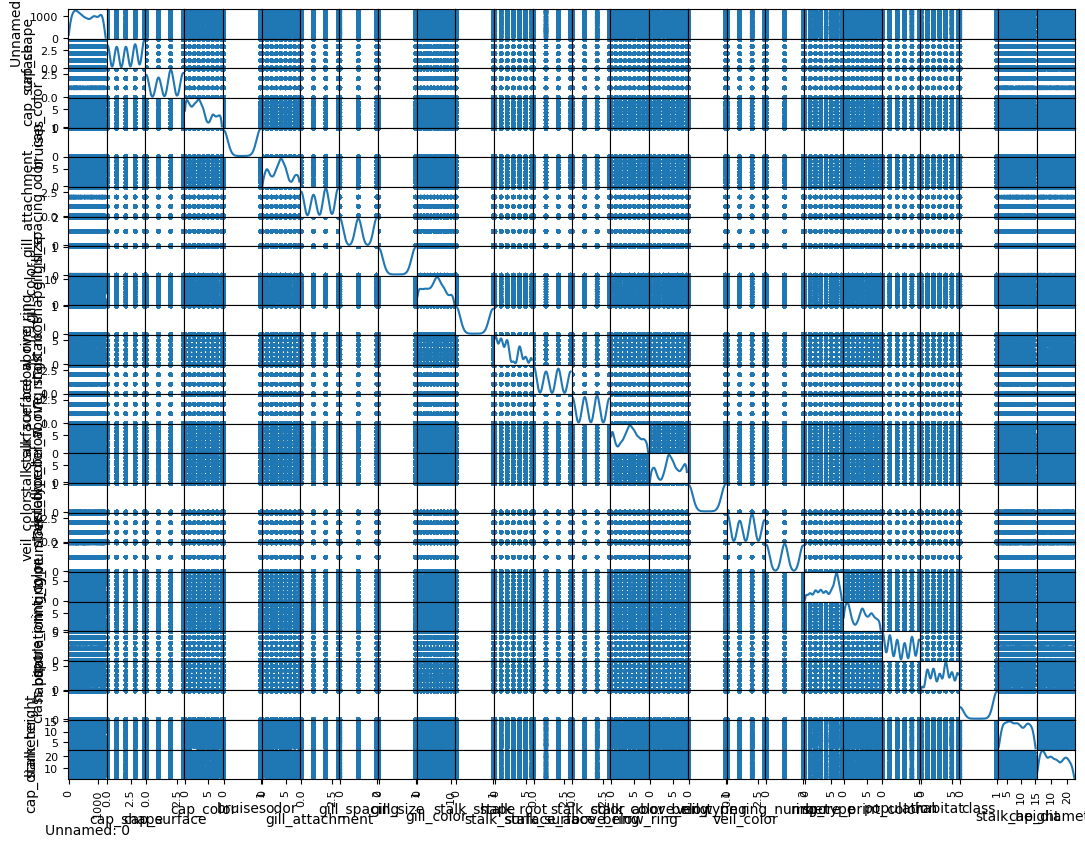

In [18]:
#pair -vise visualization

import seaborn as sns
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, alpha=1, figsize=(13, 10), diagonal='kde')
plt.show()


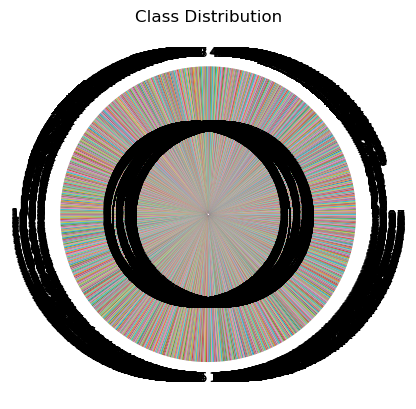

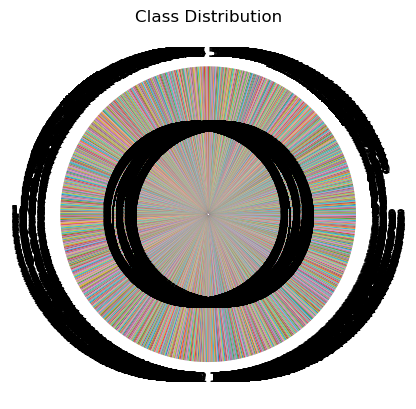

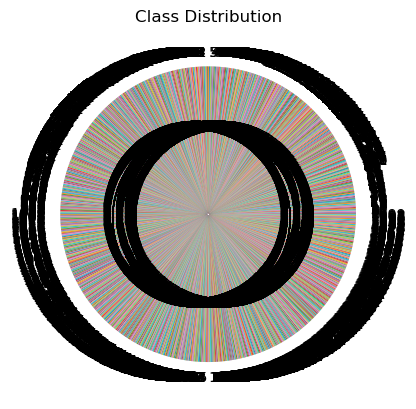

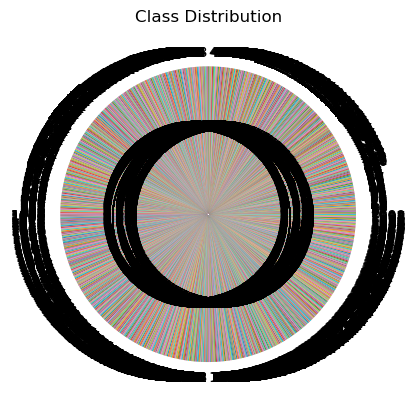

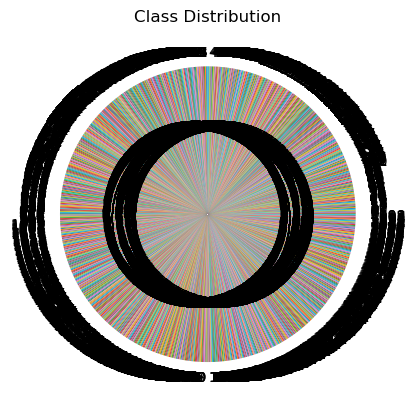

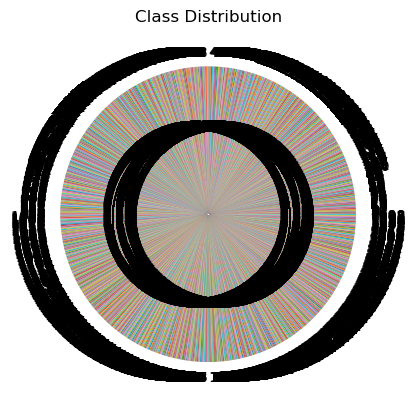

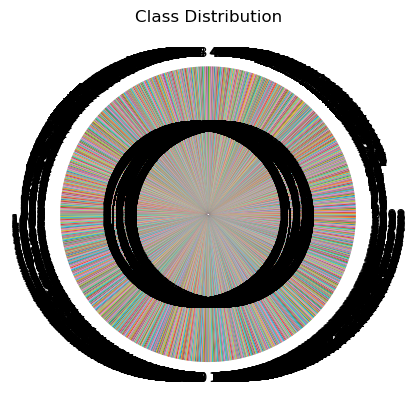

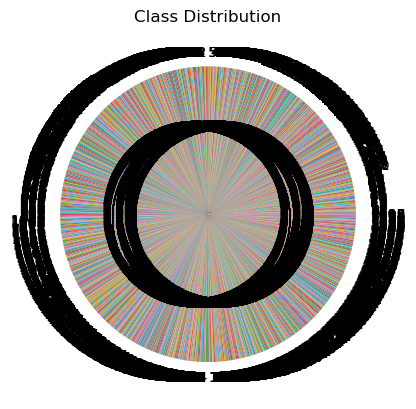

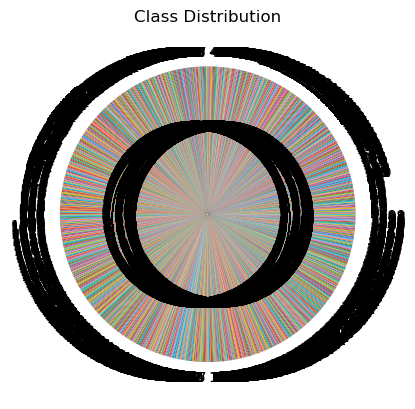

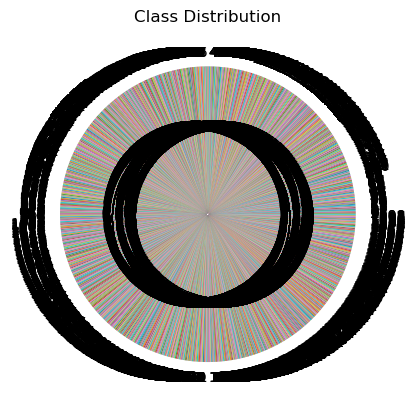

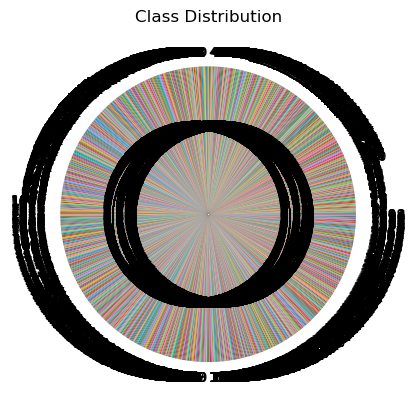

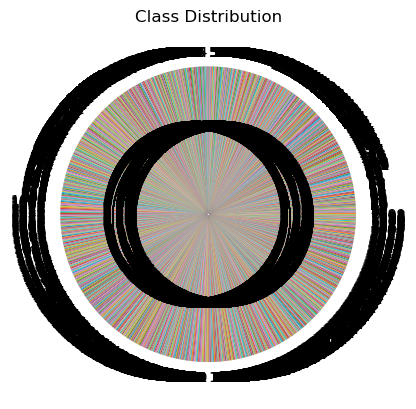

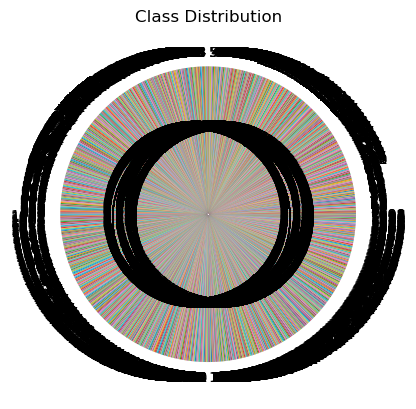

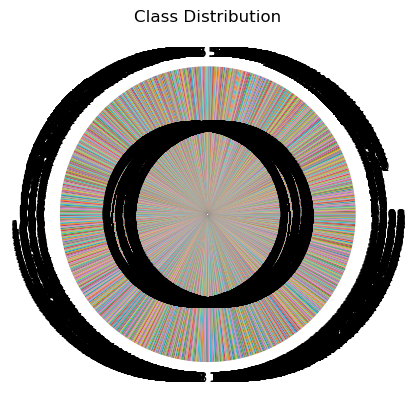

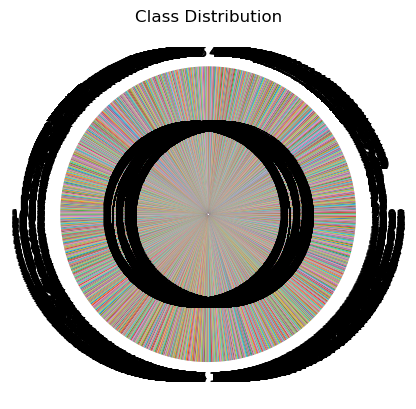

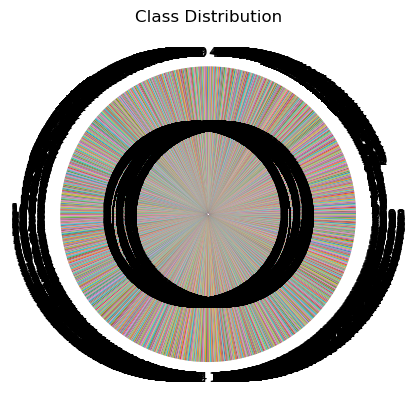

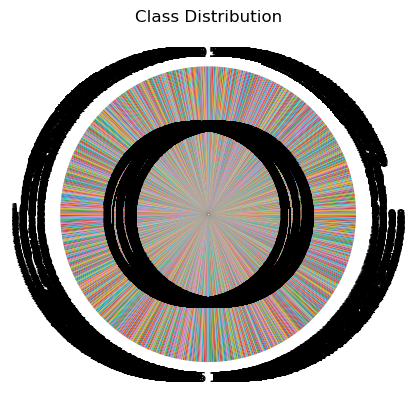

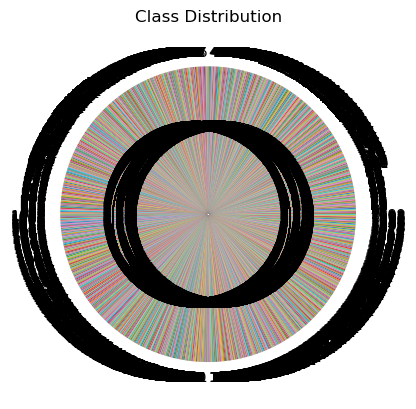

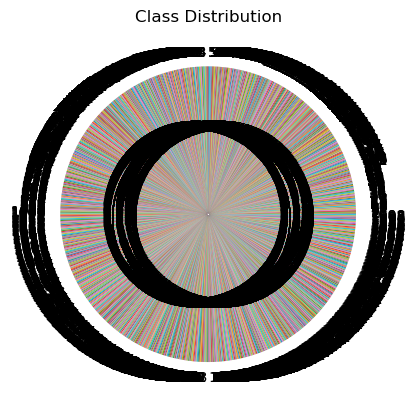

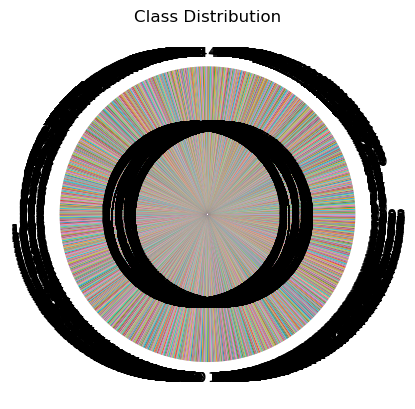

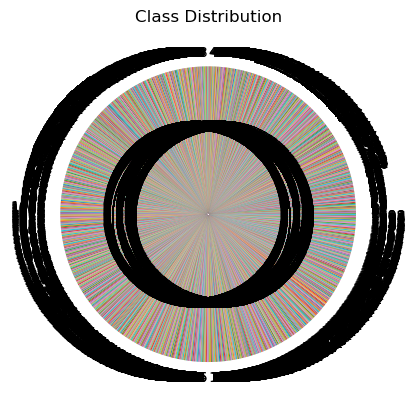

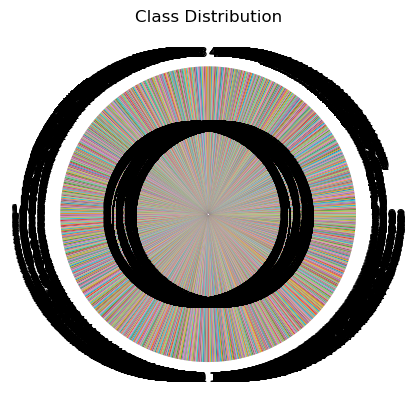

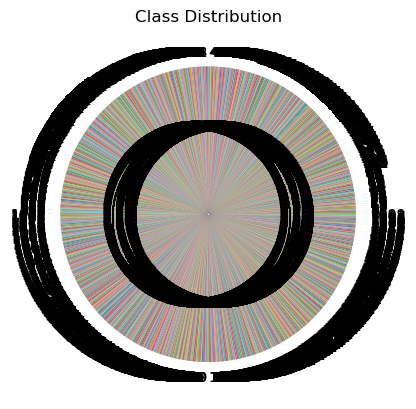

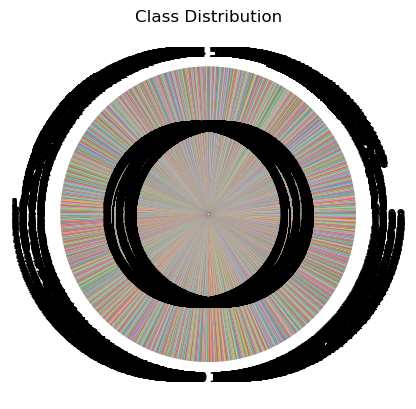

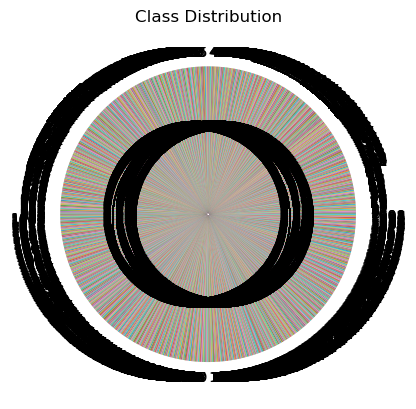

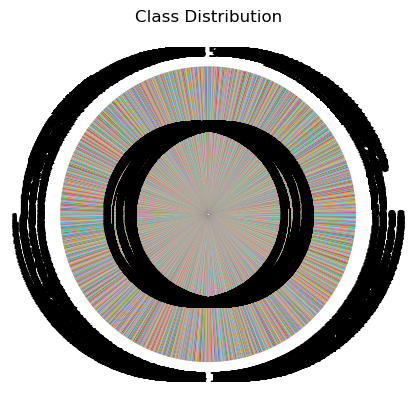

In [21]:
# pie chart
for i in df:
    plt.pie(df[i].values, labels=df[i].index, autopct='%1.1f%%')
    plt.title('Class Distribution')
    plt.show()

## SVM Implementation

CV- Traning Accuracy:  1.0
CV- Test Accuracy:  0.85
CV- Traning loss:  0.0
CV- Test loss:  5.23


ValueError: Filler values must be provided when X has more than 2 training features.

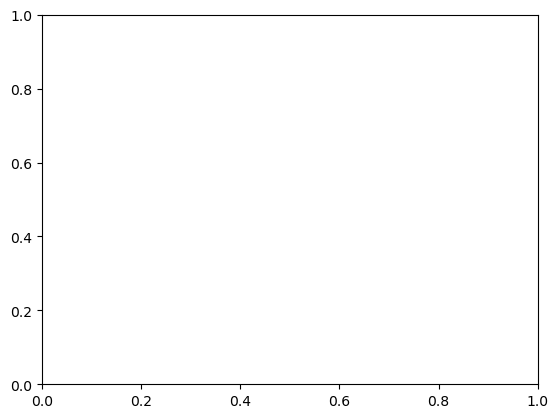

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np
# import the model

# accuracy, precision, recall, F1-score

from sklearn.svm import SVC
# clf = SVC(C=1.0,kernel='linear')
# clf = SVC(C=1.0,kernel='poly',degree=2)
#clf = SVC(C=1.0,kernel='poly',degree=3)
clf = SVC(C=100.0,kernel='rbf',gamma='scale')

###  --> Cross validation method
training_acc = []
test_acc = []
traning_loss = []
test_loss = []
# training_precision_score = []
# test_precision_score = []
# training_recall_score = []
# test_recall_score = []

from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
for i in range(0,500,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X_new,Y,test_size = 0.2,random_state=i)
    clf.fit(X_train,Y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    training_acc.append(accuracy_score(Y_train,y_pred_train))
    test_acc.append(accuracy_score(Y_test,y_pred_test))
    
    traning_loss.append(log_loss(Y_train,y_pred_train))
    test_loss.append(log_loss(Y_test,y_pred_test))
    
    # training_precision_score.append(precision_score(Y_train,y_pred_train))
    # test_precision_score.append(precision_score(Y_test,y_pred_test))
    
    # training_recall_score.append(recall_score(Y_train,y_pred_train))
    # test_recall_score.append(recall_score(Y_test,y_pred_test))

import numpy as np
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))

print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))

# print("CV- Traning prescision score: ",np.mean(training_precision_score).round(2))
# print("CV- Test prescision score: ",np.mean(test_precision_score).round(2))

# print("CV- Traning recall score: ",np.mean(training_recall_score).round(2))
# print("CV- Test recall score: ",np.mean(test_recall_score).round(2))



from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_new.values, 
                      y=Y.values,
                      clf=clf, 
                      legend=4)

In [18]:
# accuracy, precision, recall, F1-score

# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# !pip install mlxtend

!pip install mlxtend


## Visualization of SVM Results

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

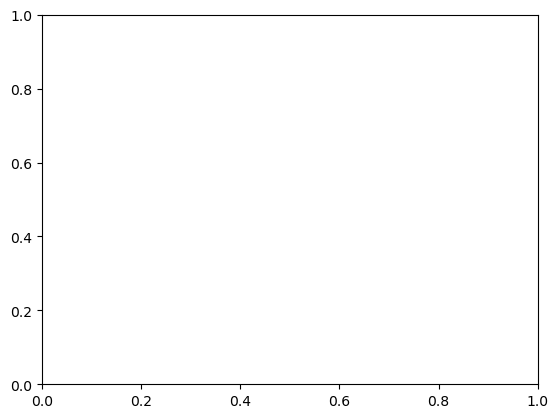

In [9]:


from sklearn.svm import SVC
clf = SVC(C=1.0,kernel='linear')
#clf = SVC(C=1.0,kernel='poly',degree=2)
#clf = SVC(C=1.0,kernel='poly',degree=3)
# clf = SVC(C=1.0,kernel='rbf',gamma='scale')


from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X.iloc[:,0:2].values, 
                      y=Y.values,
                      clf=clf, 
                      legend=4)